# Rain Prediction in Australia using Logistic Regression

In this project, I am implementing a predictive model on Rain Dataset of Australia. It is to predict whether or not it will rain tommorrow in Autralia. The Dataset contains about 10 years of daily weather observations of different locations of Australia. 

### Author : Helana Kuriakose

## Problem Statement

Australia has gone through one of the worst bushfires in NSW. Drought and water scarcity have been persistent problem. Design a machine learning model with a reasonable level of prediction accuracy to predict whether or not it will rain tommorrow in Australia.

## Work Flow

##### 1)	Data collection 

##### 2)    Data Pre-processing

##### 3)	Train – Test data

##### 4)	Model Training

##### 5)	Model Evaluation

## Importing libraries

In [1]:
# importing libraries required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Data Collection and Analysis

In [2]:
# loading the dataset intp pandas dataframe

aus_data = pd.read_csv("F:\python\weatherAUS.csv")

print("Dataset Loaded Succssfully")

Dataset Loaded Succssfully


In [3]:
# check the first 10 rows of the dataset to get an over-view of the dataset

aus_data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [4]:
# checking the feature values

aus_data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Dataset Description

In [5]:
# checking the diamension of the datapoints

aus_data.shape

(145460, 23)

The dataset consists of 145460 rows(records) and 23 columns(features).

## Data Pre-processing

The given data may be messy, incomplete, unstructured, inconsistant or redundant. So it os very important to pre-process the data.Otherwise it is almost impossible to gain insight from raw data.

In [6]:
# getting the information about the dataset

aus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Out of 23 features, 7 of them are categorical features and 16 of them are numerica features.


Except for Date and Location columns, every columns has missing values.

### Finding the categorical features and numerical features

#### Categorical Features

In [7]:
# printing the categorical features

categorical_features = [column_name for column_name in aus_data.columns 
                       if aus_data[column_name].dtype == object]

print("Number of Categorical Features :{}".format(len(categorical_features)))

print("\nCategorical Features : {}".format(categorical_features))

Number of Categorical Features :7

Categorical Features : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


#### Numerical Features

In [8]:
# printing the numberical features

numerical_features = [column_name for column_name in aus_data.columns
                     if aus_data[column_name].dtype == float]

print("Number of Numerical Features :{}".format(len(numerical_features)))

print("\nNumerical Features :{}".format(numerical_features))

Number of Numerical Features :16

Numerical Features :['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


### Finding number of missing values

In [9]:
# checking the number of missing values in each columns

aus_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

### Descriptive statistics

In [10]:
# getting the summary of the dataset

# excluding objects

aus_data.describe(exclude = [object]).T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [11]:
# including objects

aus_data.describe(include = [object]).T

,count,unique,top,freq
Date,145460,3436,2016-03-26,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


### Cardinality check for categorical variable

Cardinality is the number of unique values in each categorical feature. A feature with an high number of diatinct/unique value is a high cardinality feature. The high cardinality feature poses many serious problems. So we should use feature engineering or we should simply drop the feature, if it doesn't add any values to the model.

In [12]:
for feature in categorical_features:
    unique_values = len(aus_data[feature].unique())
    
    print("Cardinality of {} are : {}".format(feature,unique_values))

Cardinality of Date are : 3436
Cardinality of Location are : 49
Cardinality of WindGustDir are : 17
Cardinality of WindDir9am are : 17
Cardinality of WindDir3pm are : 17
Cardinality of RainToday are : 3
Cardinality of RainTomorrow are : 3


Date column poses high cardinality(3436).

#### Feature engineering of Date column to decrease cardinality.

In [13]:
aus_data['Date'] = pd.to_datetime(aus_data['Date'])

# extracting Year,Month and Day from Date

aus_data['Year'] = aus_data['Date'].dt.year
aus_data['Month'] = aus_data['Date'].dt.month
aus_data['Day'] = aus_data['Date'].dt.day

In [14]:
# drop date column

aus_data.drop(['Date'], axis = 1, inplace = True)

In [15]:
aus_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


### Handling Missing Values

#### Handling Missing Values of Categorical Features

In [16]:
categorical_features = [column_name for column_name in aus_data.columns
                       if aus_data[column_name].dtype == 'O']

aus_data[categorical_features].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

Imputing the missing values in categorical features using Mode value (the most frequent value).

In [17]:
categorical_features_with_null = [feature for feature in categorical_features
                                 if aus_data[feature].isnull().sum()]

for each_feature in categorical_features_with_null:
    aus_data[each_feature].fillna(aus_data[each_feature].mode()[0], inplace = True)

In [18]:
aus_data[categorical_features].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

#### Handling missing values in Numericl features

In [19]:
numerical_features = [column_name for column_name in aus_data.columns
                     if aus_data[column_name].dtype != 'O']

aus_data[numerical_features].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

Missing values of the numerical features can be treated using Mean and Median. If we wanted to handle the numerical missing value with Mean, then outliers in numerical features need to be addressed properly.

### Outlier detection

Outliers are the values that lies in an abnormal position from the other values in a given sample. The Mean value is highly affected by those outlier values.

In [20]:
# finding outliers and removing outliers

features_with_outliers = aus_data[numerical_features]

for feature in features_with_outliers:
    q1 = aus_data[feature].quantile(0.25)
    q3 = aus_data[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    aus_data.loc[aus_data[feature]<lower_limit, feature] = lower_limit
    aus_data.loc[aus_data[feature]>upper_limit, feature] = upper_limit

Now the numerical features are free from outliers.

Now imputing the missing values in numerical features using Mean value.

In [21]:
numerical_features_with_null = [feature for feature in numerical_features
                               if aus_data[feature].isnull().sum()]

for each_feature in numerical_features_with_null:
    aus_data[each_feature].fillna(aus_data[each_feature].mean(), inplace = True)

In [22]:
aus_data[numerical_features].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [23]:
# checking all the missing values in the dataset

aus_data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

We have cleared all the missing values in the dataset.

### Exploratory Data Analysis

#### Exploring target variable

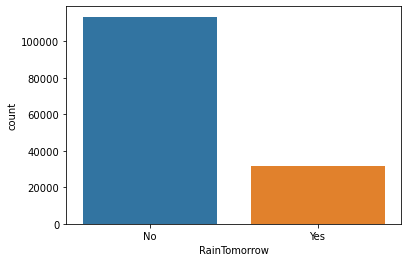

In [24]:
sb.countplot(aus_data['RainTomorrow'])

###  Data Encoding

Most of the Machine learning algorithms can't handle categorical data. Hence these categorical data are converted into numerical data for modeling. This conversion is called Feature Encoding. 

#### Encoding for categorical variable

In [25]:
from sklearn.preprocessing import LabelEncoder

# making an instance 

labelencoder = LabelEncoder()

In [26]:
# encoding

for each_feature in categorical_features:
    aus_data[each_feature] = labelencoder.fit_transform(aus_data[each_feature])

In [27]:
aus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int32  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int32  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int32  
 9   WindDir3pm     145460 non-null  int32  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

We have changed the categorical features into numerical features.

### Correlation

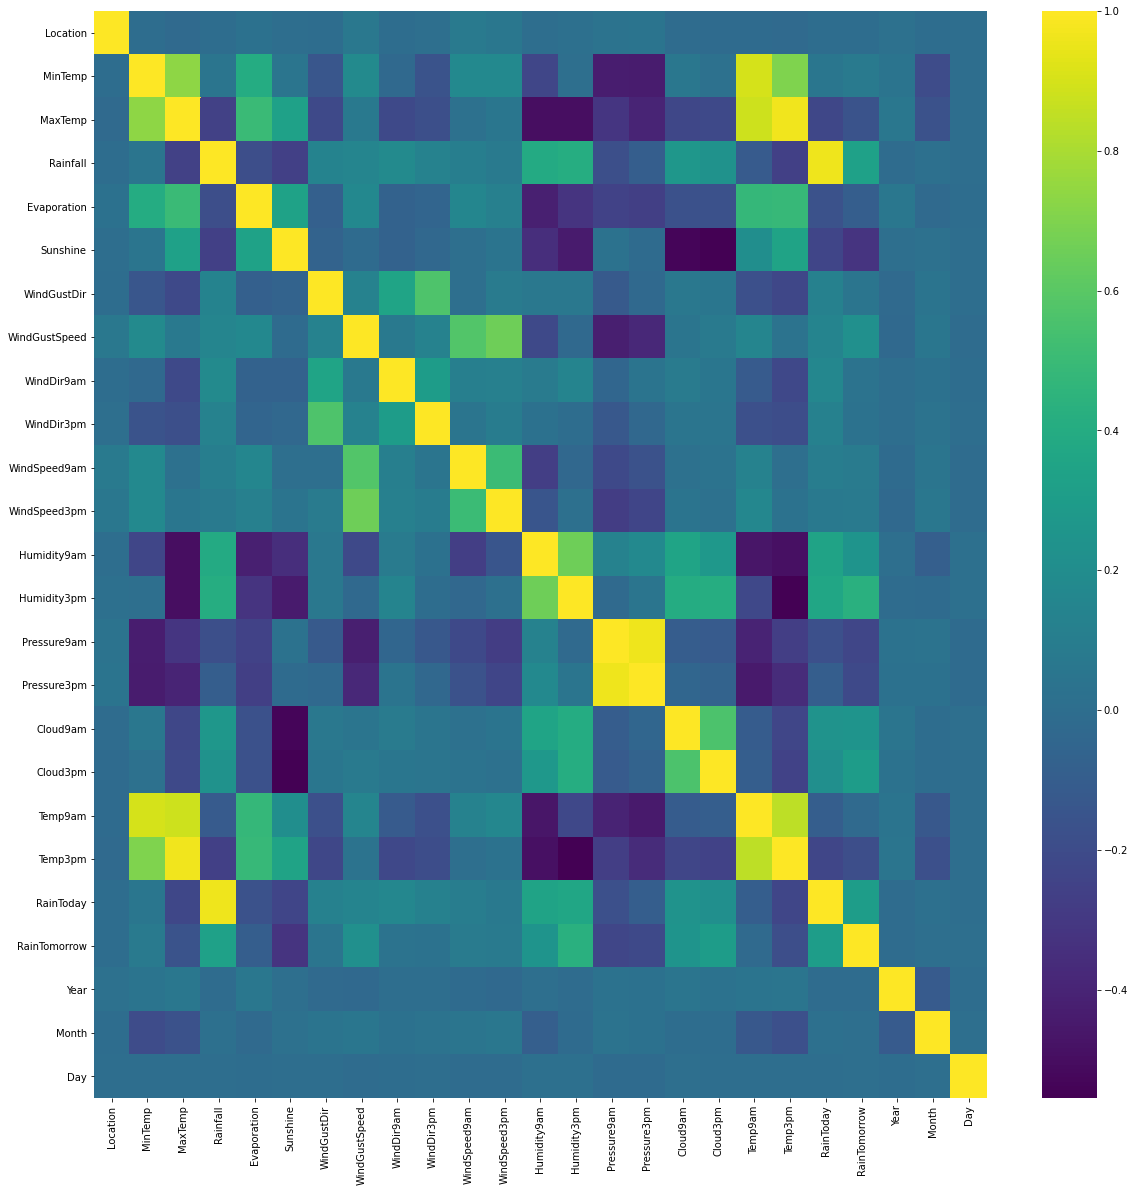

In [28]:
plt.figure(figsize = (20,20))
sb.heatmap(aus_data.corr(), annot = False, cmap = 'viridis')

### Splitting data into Independent and Dependent features

In [29]:
x = aus_data.drop(['RainTomorrow'], axis = 1)

y = aus_data['RainTomorrow']

Independent features are stored in x and dependent feature is stored in y.

### Feature Importance

Feature Importance describes which features are relevant to build a model. Feature importance refers to the techniques that assign a score to input features based on how useful they are at predicting a target variable. Feature Importance helps in Feature Selection.

In [31]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()

etr.fit(x,y)

etr.feature_importances_

array([0.03131436, 0.0303577 , 0.02891294, 0.03969261, 0.0235729 ,
       0.04312628, 0.02970195, 0.05700145, 0.03060111, 0.03156511,
       0.03094092, 0.03240723, 0.03680302, 0.2082446 , 0.03563241,
       0.05064484, 0.02409392, 0.03441126, 0.02834697, 0.02860919,
       0.0497526 , 0.03103434, 0.03029874, 0.03293355])

Visualizing the feature importance value:

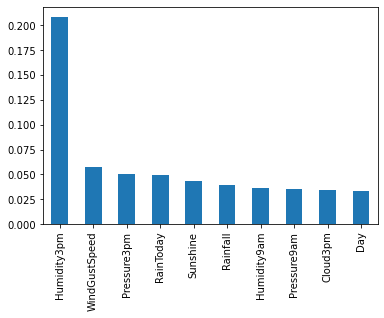

In [32]:
feature_values = pd.Series(etr.feature_importances_, index = x.columns)
feature_values.nlargest(10).plot(kind = 'bar')

### Train - Test Splitting

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [34]:
print("Size of x:",x.shape)
print("x_train size:",x_train.shape)
print("x_test size:",x_test.shape)
print("Size of y:",y.shape)
print("y_train size:",y_train.shape)
print("y_test size:",y_test.shape)

Size of x: (145460, 24)
x_train size: (116368, 24)
x_test size: (29092, 24)
Size of y: (145460,)
y_train size: (116368,)
y_test size: (29092,)


### Feature Scaling

Feature scaling is used to scale, normalize, standardize the data.

In [35]:
from sklearn.preprocessing import StandardScaler

sd_scaler = StandardScaler()

In [36]:
x_train = sd_scaler.fit_transform(x_train)

In [37]:
x_test = sd_scaler.fit_transform(x_test)

### Model Building

#### Model Training

In [38]:
from sklearn.linear_model import LogisticRegression

logisticregression = LogisticRegression()

In [39]:
logisticregression.fit(x_train, y_train)

LogisticRegression()

#### Model Testing

In [40]:
y_pred = logisticregression.predict(x_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

#### Evaluating Model Performance

In [41]:
from sklearn.metrics import accuracy_score

print("Accuracy Score : {}".format(accuracy_score(y_test, y_pred)))

Accuracy Score : 0.8413653238003574


#### Checking for Overfitting and Underfitting

In [42]:
print("Train data score : {}".format(logisticregression.score(x_train, y_train)))

print("\nTest data score : {}".format(logisticregression.score(x_test, y_test)))

Train data score : 0.844759727760209

Test data score : 0.8413653238003574


#### Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:

[[21455  1179]
 [ 3436  3022]]


#### Classificstion Report

In [44]:
from sklearn.metrics import classification_report

print("Classification Report :\n")
print(classification_report(y_test, y_pred))

Classification Report :

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22634
           1       0.72      0.47      0.57      6458

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.73     29092
weighted avg       0.83      0.84      0.83     29092



#### Cross-validation

Checking whether model performance can be improved using Cross-validation Score.

In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logisticregression, x_train, y_train, cv = 5, scoring = "accuracy")

print("Cross-Validation Scores : {}".format(scores))
print("\nAverage Cross_Validation score : {}".format(scores.mean()))

Cross-Validation Scores : [0.84566469 0.84484833 0.84390307 0.84402527 0.84393933]

Average Cross_Validation score : 0.844476136157035


Average Cross-Validation score is almost same as the Accuracy score of Logistic regression.So the accuracy of the model may not be improved using Cross-Validation.